<h1>Red-Wine Analysis</h1>

In this project I will analyse Wine quality by means of kNeighborsClassification (machine learning algorithm).
<br>
                                ***By - SRIPRANAV KUMAR MUKTEVI***
<br>

<h2>ABSTRACT : </h2>Wine classification is a difficult task since taste is the least understood of the human senses. A good wine quality
prediction can be very useful in the certification phase, since currently the sensory analysis is performed by human tasters, being
clearly a subjective approach. An automatic predictive system can be integrated into a decision support system, helping the
speed and quality of the performance. Furthermore, a feature selection process can help to analyze the impact of the analytical
tests. If it is concluded that several input variables are highly relevant to predict the wine quality, since in the production process
some variables can be controlled, this information can be used to improve the wine quality. Classification models used here is kNeighborsClassification.
<br>
<h2>KEYWORDS : </h2>Machine Learning, Classification,kNeighborsClassification,Prediction.
<br>
<h3>Instructions:</h3>
1.Import the dataset.

2.Data quality check:
    * Check if null values are present. If there are, drop those rows.
    
3.Exploratory Data Analysis:

    * Univariate Analysis:
        i. Draw a minimum of 5 histograms .
        ii. Draw boxplots for each numerical columns.
    * Bivariate analysis:
        i. Draw a minimum of 5 scatter plots
        
4.Modelling:

    * Split the dataset using “train-test-split” function.
    * Apply KNN classification on “quality” column of the dataset. Select the appropriate features
    * Predict on the test set.
    * Find out the accuracy.

## Step : Import Prerequisite Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
%matplotlib inline

sns.set()

### Step : Now we will load the Dataset
<br>
Dataset used here is https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

In [2]:
#Loading data

data = pd.read_csv("./winequality-red.csv")

#Displaying Data

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Step: Preliminary Checks

In [3]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Step : Data Quality Check
### Check if null values are present.

In [4]:
data.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

***So We Don't Have Any Missing Values ......***

### Examine the features in the data-set and their data types

In [5]:
display(data.info)

<bound method DataFrame.info of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067

## Step : Exploratory Data Analysis


### Univariate Analysis :

**Quality frequency Histogram**

D:\pran\anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


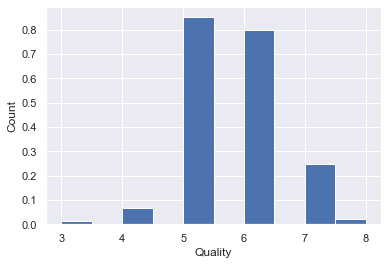

In [6]:
_ = plt.hist(data['quality'],normed=True)
_ = plt.xlabel('Quality')
_ = plt.ylabel('Count')
plt.show()

This shows quality ratings of 5,6 are high.
Indicating most of the produce has been of good quality

**pH Frequency Histogram**

D:\pran\anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


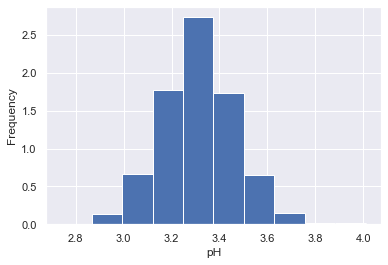

In [7]:
_ = plt.hist(data['pH'],normed=True)
_ = plt.xlabel('pH')
_ = plt.ylabel('Frequency')
plt.show()

This Graph indicates pH of 3.3 was found in most test samples

**Chloride Content in samples found**

D:\pran\anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


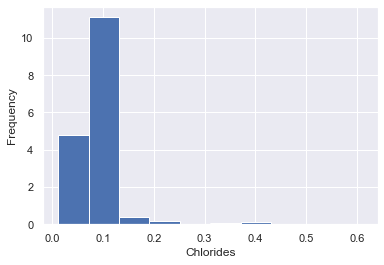

In [8]:
_ = plt.hist(data['chlorides'],normed=True)
_ = plt.xlabel('Chlorides')
_ = plt.ylabel('Frequency')
plt.show()

This indicates 0.1% of chlorides was found in  most test Samples

**Density frequency Histogram**

D:\pran\anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


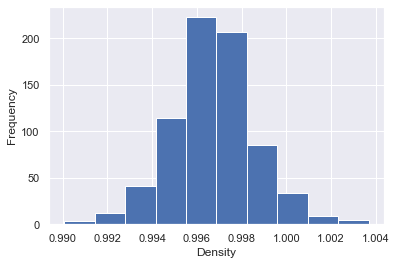

In [9]:
_ = plt.hist(data['density'],normed=True)
_ = plt.xlabel('Density')
_ = plt.ylabel('Frequency')
plt.show()

This shows 0.996-0.998 g/cm^3 density was found in most wine Samples

**Alcohol content histogram**

D:\pran\anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


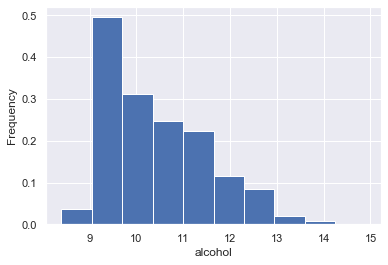

In [10]:
_ = plt.hist(data['alcohol'],normed=True)
_ = plt.xlabel('alcohol')
_ = plt.ylabel('Frequency')
plt.show()

This graph indicates most red wine samples contained 9%-10% alcohol content

### Boxplot analysis
**All features**

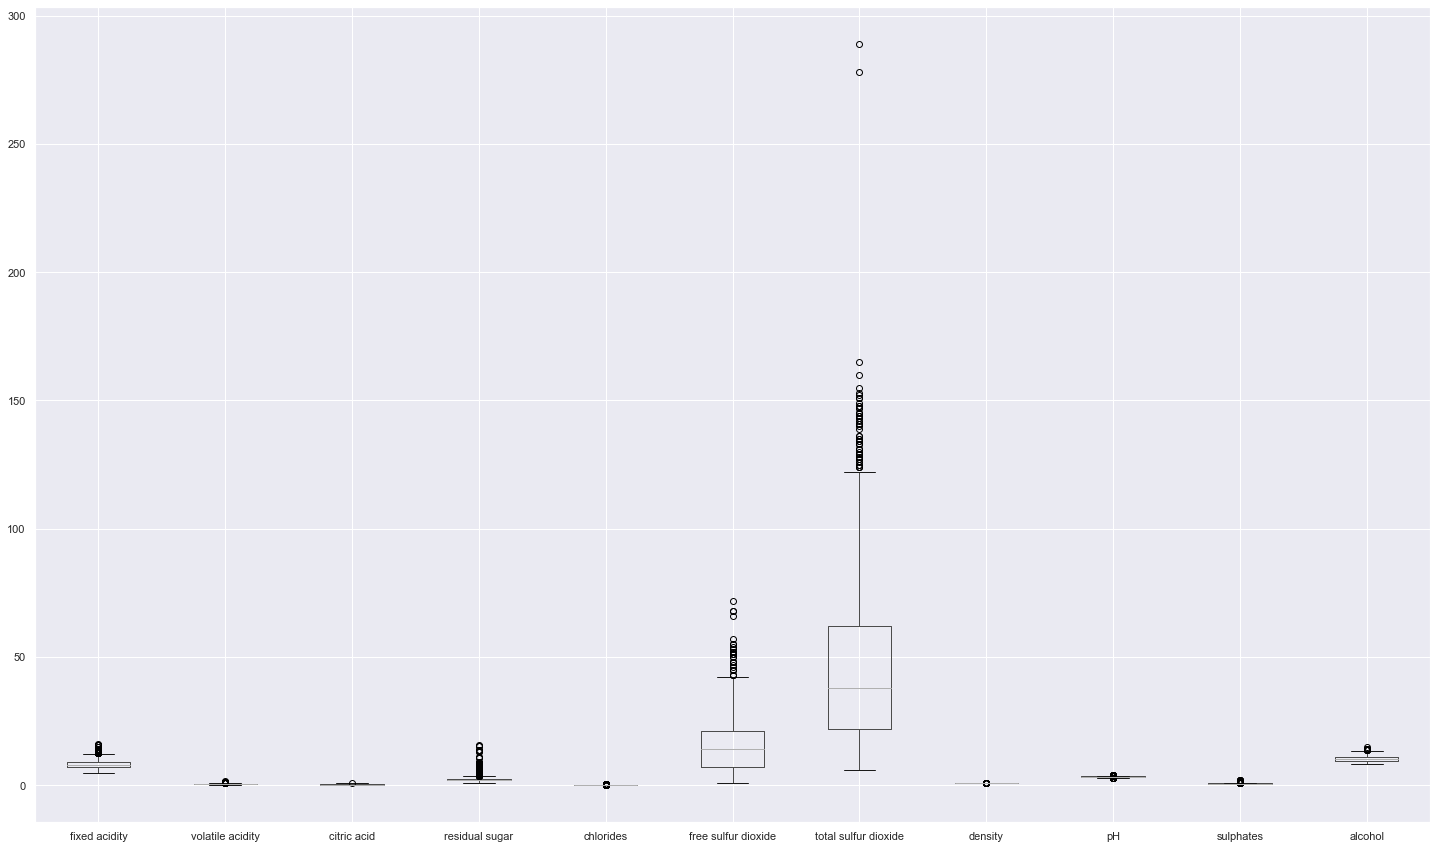

In [11]:
plt.figure(figsize=(25,15))
data.drop(['quality'],axis = 1).boxplot()
plt.show()

It can percieved that there are outliers in each feature which may cause trouble in predicting outcome

**Fixed Acidity boxplot**

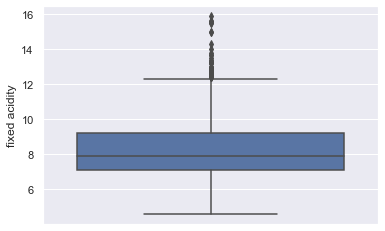

In [12]:
sns.boxplot(y = data['fixed acidity'])
plt.show()

This shows there are a few outliers above the value 14.3

**Volatile acidity**

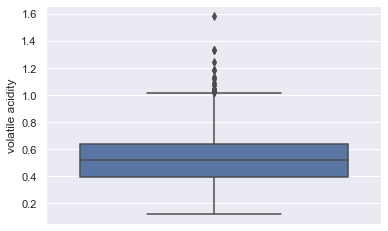

In [13]:
sns.boxplot(y = data['volatile acidity'])
plt.show()

We have outliers above 1.6

**Citric acid**

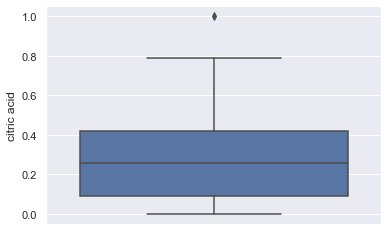

In [14]:
sns.boxplot(y = data['citric acid'])
plt.show()

Outliers are negligible

**Residual Sugar**

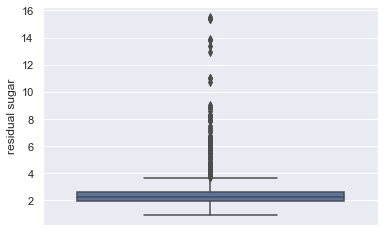

In [15]:
sns.boxplot(y = data['residual sugar'])
plt.show()

Outlier above 13

**Chlorides**

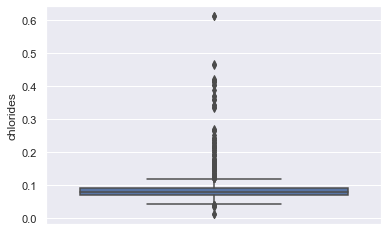

In [16]:
sns.boxplot(y = data['chlorides'])
plt.show()

Outliers above 0.6

**Free Sulfur Dioxides**

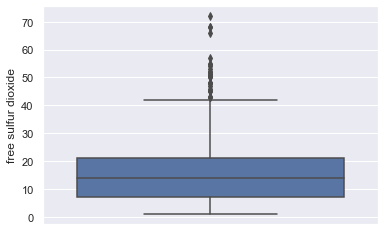

In [17]:
sns.boxplot(y = data['free sulfur dioxide'])
plt.show()

**Total Sulfur Dioxide**

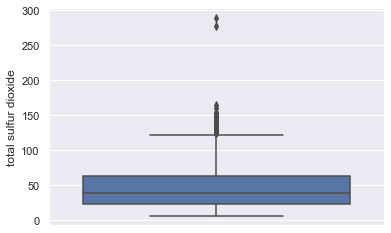

In [18]:
sns.boxplot(y = data['total sulfur dioxide'])
plt.show()

Outliers above 250

**Density**

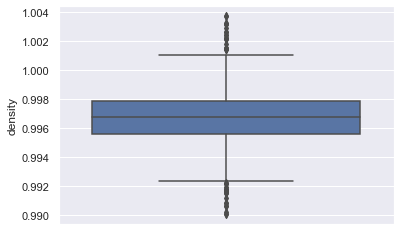

In [19]:
sns.boxplot(y = data['density'])
plt.show()

**pH**

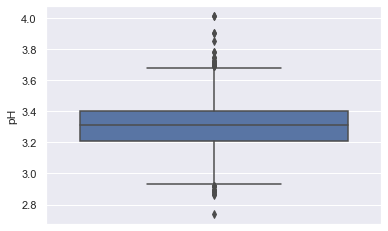

In [20]:
sns.boxplot(y = data['pH'])
plt.show()

**Sulphates**

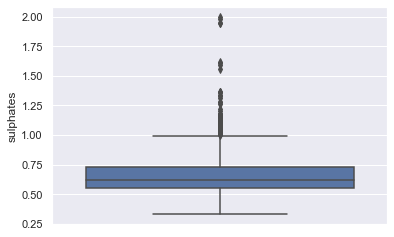

In [21]:
sns.boxplot(y = data['sulphates'])
plt.show()

Outliers above 1.75

**Alcohol**

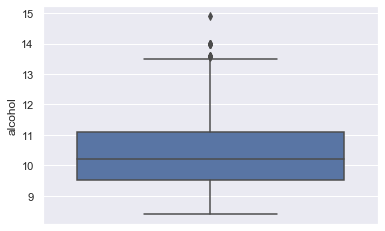

In [22]:
sns.boxplot(y = data['alcohol'])
plt.show()

Outlier at 15

**Brief Quality analysis via boxplot**

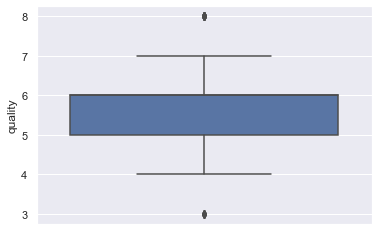

In [23]:
sns.boxplot(y = data['quality'])
plt.show()

This indicates major chunk of observations had quality rating between 5-6

### Bivariate Analysis
**Alcohol VS quality**

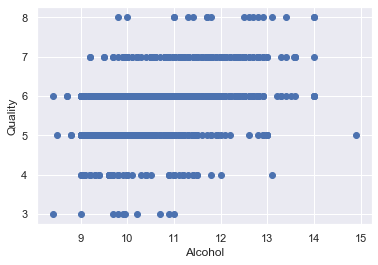

In [24]:
plt.scatter(data['alcohol'],data['quality'])
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.show()

**Volatile Acidity VS Quality**

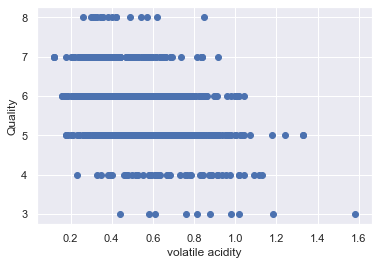

In [25]:
plt.scatter(data['volatile acidity'],data['quality'])
plt.xlabel('volatile acidity')
plt.ylabel('Quality')
plt.show()

**Sulphates VS Quality**

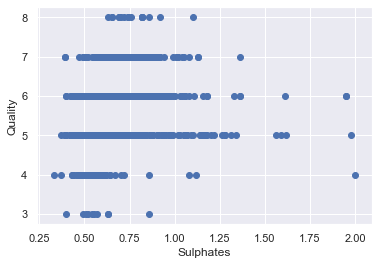

In [26]:
plt.scatter(data['sulphates'],data['quality'])
plt.xlabel('Sulphates')
plt.ylabel('Quality')
plt.show()

**Citric Acid VS Quality**

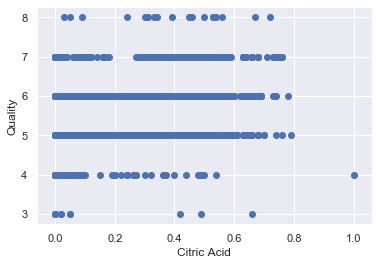

In [27]:
plt.scatter(data['citric acid'],data['quality'])
plt.xlabel('Citric Acid')
plt.ylabel('Quality')
plt.show()

**Density VS Quality**

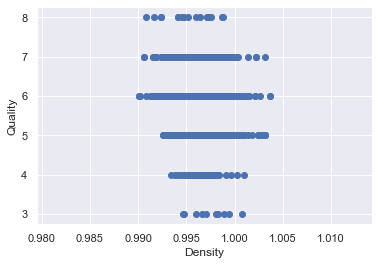

In [28]:
plt.scatter(data['density'],data['quality'])
plt.xlabel('Density')
plt.ylabel('Quality')
plt.show()

### Correlation Heat-Map

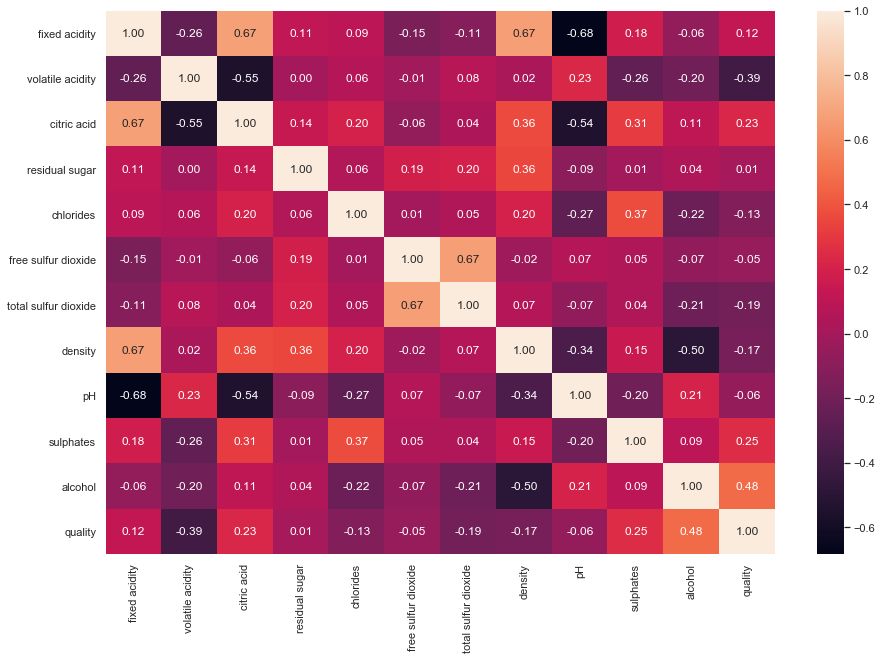

In [29]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot = True, fmt=".2f")

This suggests Quality of Wine is more dependant on alcohol and acidity than other stuff
<h2>Feature Selection :</h2> Inferring from the above correlation matrix we can conclude that residual sugar does not play a good role the determination of quality of red Wine.

## Step : Modelling
**Removing Outliers**

In [30]:
# For each feature find the data points with extreme high or low values
for feature in data.keys():
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(data[feature], q=25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(data[feature], q=75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    interquartile_range = Q3 - Q1
    step = 1.5 * interquartile_range
    
    # Display the outliers
#     print("Data points considered outliers for the feature '{}':".format(feature))
#     display(data[~((data[feature] >= Q1 - step) & (data[feature] <= Q3 + step))])
    
    # OPTIONAL: Select the indices for data points you wish to remove
    outliers = []
    # Remove the outliers, if any were specified
    good_data = data.drop(data.index[outliers]).reset_index(drop = True)

In [31]:
X = good_data.drop(['quality','residual sugar'], axis = 1)
y = good_data['quality']

**Train-test-split**

In [32]:
X_features = X
X = StandardScaler().fit_transform(X)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.21, random_state=0)

In [34]:
knn = KNeighborsClassifier(n_neighbors=90)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(y_pred)
print(classification_report(y_test, y_pred, zero_division=1))

[6 5 7 5 6 5 5 6 5 5 5 5 6 6 6 6 7 6 6 5 6 5 6 5 5 5 5 6 5 6 6 6 6 5 6 6 5
 5 6 6 5 6 6 6 6 5 5 6 5 6 5 5 5 6 6 5 5 5 7 5 5 6 6 6 5 6 5 6 6 6 5 5 5 5
 6 6 5 5 5 6 6 5 6 6 6 5 6 5 6 5 5 5 6 5 6 5 7 5 5 6 7 6 6 6 6 5 6 6 6 5 6
 5 6 5 6 6 6 7 6 6 5 6 5 5 6 7 5 5 6 7 5 5 6 6 6 5 6 5 6 5 6 5 5 5 6 6 6 6
 6 5 6 6 6 5 5 6 6 5 6 6 6 6 6 5 6 5 6 6 5 6 6 6 5 7 6 6 6 7 6 5 5 7 5 6 6
 5 5 6 5 6 6 6 5 5 5 5 5 5 5 5 5 6 5 5 5 5 5 6 6 5 6 5 5 6 5 6 6 6 6 5 5 6
 6 6 6 6 6 6 5 5 5 6 5 6 6 6 6 7 6 6 5 5 5 5 6 5 5 5 5 6 5 5 5 5 6 6 5 5 5
 6 5 6 5 6 5 5 5 5 6 6 5 6 5 6 6 6 6 5 7 6 5 6 6 6 6 5 5 5 6 6 6 6 6 5 5 6
 5 5 5 5 6 5 5 5 6 6 5 5 5 5 5 6 5 5 5 7 6 6 5 7 5 6 6 6 5 5 7 5 5 5 7 5 5
 6 5 6]
              precision    recall  f1-score   support

           3       1.00      0.00      0.00         2
           4       1.00      0.00      0.00        11
           5       0.66      0.73      0.69       144
           6       0.59      0.64      0.61       146
           7       0.47      0.28      0.35   

In [35]:
print('Accuracy of the model is :     ' + str(accuracy_score(y_test, y_pred)))

Accuracy of the model is :     0.6160714285714286


## Using Binary Quality Analysis
Here for every rating above 7 will be treated as Good Wine and rest as Bad Wine

In [36]:
#Create Classification version of target variable
good_data['goodquality'] = [1 if x >= 7 else 0 for x in data['quality']]
# Separate feature variables and target variable

y = good_data['goodquality']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.21, random_state=0)
knn = KNeighborsClassifier(n_neighbors=90)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(y_pred)
print(classification_report(y_test, y_pred, zero_division=1))

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 0]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       303
           1       0.77      0.30      0.43        33

    accuracy                           0.92       336
   macro avg       0.85      0.65      0.70       336
weighted avg       0.91      0.92      0.91  

In [38]:
print('Accuracy of the model is :     ' + str(accuracy_score(y_test, y_pred)))

Accuracy of the model is :     0.9226190476190477


## Conclusion : 
Based on the box plots plotted we come to an conclusion that not all input features are essential and affect the data, for example from the bar plot against quality and residual sugar we see that as the quality increases residual sugar is moderate and does not have change drastically. So this feature is not so essential as compared to others like alcohol and citric acid, so we can drop this feature while feature selection.

For classifying the wine quality, we have implemented algorith namely, **kNeighborsClassification**
We were able to achieve maximum accuracy using of **92%** when Quality was predicted as either good or bad, while accuracy of 62% was achieved when Quality was predicted with range 0-10